# Analyse tabellarischer Daten mit Python und Pandas

Dieses Tutorial ist das sechste in einer Reihe zur Einführung in die Programmierung und Datenanalyse mithilfe der Python-Programmiersprache. Diese Tutorials basieren auf einem praktischen, programmbasierten Ansatz. Der beste Weg, das Material zu erlernen, besteht darin, den Code auszuführen und mit den Beispielen zu experimentieren.


Die folgenden Themen werden in diesem Tutorial behandelt:

* [Eine CSV-Datei mit Pandas einlesen](#csv-pandas-einlesen)
* [Abrufen von Daten aus einem Data Frame](#daten-data-frame)
* [Analysieren von Daten aus Data Frame](#analysieren-data-frame)
* [Zeilen abfragen und sortieren](#zeilen-abfragen)
* [Mit Datumsangaben arbeiten](#datumsangaben-arbeiten)
* [Gruppierung und Aggregation](#gruppierung-aggregation)
* [Daten aus mehreren Quellen zusammenführen](#mehrere-quellen)
* [Daten zurück in Dateien schreiben](#dateien-schreiben)
* [Bonus: Grundlegendes Plotten mit Pandas](#bonus-plotten)

<a id='csv-pandas-einlesen'></a>

## Eine CSV-Datei mit Pandas einlesen

Pandas wird in der Regel verwendet, um mit tabellarischen Daten zu arbeiten (ähnlich wie die Daten, die in einer Tabelle gespeichert sind). Pandas bietet Hilfsfunktionen zum Einlesen von Daten aus verschiedenen Dateiformaten wie CSV, Excel-Tabellen, HTML-Tabellen, JSON, SQL und mehr. Lassen Sie uns die Datei `italy-covid-daywise.txt` herunterladen, die tageweise Covid-19-Daten für Italien im folgenden Format enthält:

```
date,new_cases,new_deaths,new_tests
2020-04-21,2256.0,454.0,28095.0
2020-04-22,2729.0,534.0,44248.0
2020-04-23,3370.0,437.0,37083.0
2020-04-24,2646.0,464.0,95273.0
2020-04-25,3021.0,420.0,38676.0
2020-04-26,2357.0,415.0,24113.0
2020-04-27,2324.0,260.0,26678.0
2020-04-28,1739.0,333.0,37554.0
...
```

Diese Art der Datenspeicherung wird als *comma separated values* oder CSV bezeichnet.

> **CSVs**: Eine durch Kommas getrennte Werte (CSV) Datei ist eine Textdatei, die ein Komma zur Trennung von Werten verwendet. Jede Zeile der Datei ist ein Datensatz. Jeder Datensatz besteht aus einem oder mehreren Feldern, die durch Kommas getrennt sind. Eine CSV-Datei speichert in der Regel tabellarische Daten (Zahlen und Text) im Klartext, in welchem Fall jede Zeile die gleiche Anzahl an Feldern haben wird.

Um die Datei zu lesen, können wir die Methode `read_csv` von Pandas verwenden. Lassen Sie uns die Pandas-Bibliothek importieren. Es wird normalerweise mit dem Alias `pd` importiert.

In [1]:
import pandas as pd

In [2]:
covid_df = pd.read_csv('data/italy-covid-daywise.csv')

Daten aus der Datei werden gelesen und in einem `DataFrame`-Objekt gespeichert – einer der Kerndatenstrukturen in Pandas zum Speichern und Arbeiten mit Tabellendaten. Normalerweise verwenden wir das Suffix `_df` in den Variablennamen für Data Frame.

In [3]:
type(covid_df)

pandas.core.frame.DataFrame

In [4]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Folgendes können wir anhand des Data Frames erkennen:

- Die Datei enthält vier Tageszählungen für Covid-19 in Italien
- Bei den gemeldeten Kennzahlen handelt es sich um neue Fälle, neue Todesfälle und neue Tests
- Die Daten werden für 248 Tage bereitgestellt: vom 12. Dezember 2019 bis zum 3. September 2020

Beachten Sie, dass es sich hierbei um offiziell gemeldete Zahlen handelt und die tatsächliche Zahl der Fälle und Todesfälle höher sein kann, da nicht alle Fälle diagnostiziert werden.

Mit der Methode `.info` können wir einige grundlegende Informationen zum Data Frame anzeigen.

In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


Es scheint, dass jede Spalte Werte eines bestimmten Datentyps enthält. Für die numerischen Spalten können Sie mit der Methode `.describe` einige statistische Informationen wie Mittelwert, Standardabweichung, Minimal-/Maximalwerte und Anzahl nicht leerer Werte anzeigen.

In [6]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


Die Eigenschaft `columns` enthält die Liste der Spalten innerhalb des Data Frames.

In [7]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

Sie können die Anzahl der Zeilen und Spalten im Data Frame auch mit der Methode `.shape` abrufen

In [8]:
covid_df.shape

(248, 4)

Hier ist eine Zusammenfassung der Funktionen und Methoden, die wir uns bisher angesehen haben:

* `pd.read_csv` – Liest Daten aus einer CSV-Datei in ein Pandas-`DataFrame`-Objekt
* `.info()` – Grundlegende Informationen zu Zeilen, Spalten und Datentypen anzeigen
* `.describe()` – Statistische Informationen zu numerischen Spalten anzeigen
* `.columns` – Ruft die Liste der Spaltennamen ab
* `.shape` – Ermitteln Sie die Anzahl der Zeilen und Spalten als Tupel

<a id='daten-data-frame'></a>

## Abrufen von Daten aus einem Data Frame

Das erste, was Sie möglicherweise tun möchten, ist, Daten aus diesem Data Frame abzurufen, z. B. die Zählungen eines bestimmten Tages oder der
Liste der Werte in einer bestimmten Spalte. Hierzu kann es hilfreich sein, die interne Darstellung von Daten in einem Data Frame zu verstehen. Konzeptionell können Sie sich einen Data Frame als ein Dictionary mit Listen vorstellen: Die Schlüssel sind Spaltennamen und die Werte sind Listen/Arrays, die Daten für die jeweiligen Spalten enthalten.

In [9]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

Die Darstellung von Daten im oben genannten Format hat einige Vorteile:

* Alle Werte in einer Spalte haben normalerweise denselben Werttyp, daher ist es effizienter, sie in einem einzelnen Array zu speichern.
* Um die Werte für eine bestimmte Zeile abzurufen, müssen lediglich die Elemente an einem bestimmten Index aus jedem der Spaltenarrays extrahiert werden.
* Die Darstellung ist kompakter (Spaltennamen werden nur einmal aufgezeichnet) im Vergleich zu anderen Formaten, bei denen Sie möglicherweise ein Dictionary für jede Datenzeile verwenden (siehe Beispiel unten).

In [10]:
# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

Unter Berücksichtigung der Dictionary-Listen-Analogie können wir nun erraten, wie wir möglicherweise Daten aus einem Data Frame abrufen können. Beispielsweise können wir mithilfe der Indexierungsnotation `[]` eine Liste von Werten aus einer bestimmten Spalte abrufen.

In [11]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [12]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [13]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Jede Spalte wird durch eine Datenstruktur namens `Series` dargestellt, die im Wesentlichen ein Numpy-Array mit einigen zusätzlichen Methoden und Eigenschaften ist.

In [14]:
type(covid_df['new_cases'])

pandas.core.series.Series

Genau wie bei Arrays können Sie einen bestimmten Wert mit einer Reihe abrufen, indem Sie die Indexierungsnotation `[]` verwenden.

In [15]:
covid_df['new_cases'][246]

975.0

In [16]:
covid_df['new_tests'][243]

53541.0

Pandas bietet auch die Methode `.at`, um direkt eine bestimmte Zeile und Spalte abzurufen.

In [17]:
covid_df.at[246, 'new_cases']

975.0

In [18]:
covid_df.at[240, 'new_tests']

57640.0

Anstatt die Indexierungsnotation `[]` zu verwenden, ermöglicht Pandas auch den Zugriff auf Spalten als Eigenschaften des Data Frames mithilfe der `.`-Notation. Diese Methode funktioniert jedoch nur für Spalten, deren Namen keine Leerzeichen oder Sonderzeichen enthalten.

In [19]:
# Same as covid_df['new_cases']
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Darüber hinaus können Sie auch eine Liste von Spalten innerhalb der Indexierungsnotation `[]` übergeben, um nur mit den angegebenen Spalten auf eine Teilmenge des Data Frames zuzugreifen.

In [20]:
# Note the double bracket, the first bracket is the indexing notation
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


Beachten Sie jedoch, dass das neue Dataframe `cases_df` einfach eine "Ansicht" des ursprünglichen Dataframes `covid_df` ist, d.h. sie verweisen beide auf die gleichen Daten im Arbeitsspeicher des Computers, und das Ändern von Werten in einem von ihnen ändert auch die entsprechenden Werte im anderen. Das Teilen von Daten zwischen Dataframes macht die Datenmanipulation in Pandas blitzschnell, und Sie müssen sich keine Sorgen über den Overhead des Kopierens von Tausenden oder Millionen von Zeilen machen, jedes Mal wenn Sie ein neues Dataframe erstellen möchten, indem Sie auf einem bestehenden operieren.

Manchmal benötigen Sie eine vollständige Kopie des Dataframes, in diesem Fall können Sie die `copy` Methode verwenden.

In [21]:
covid_df_copy = covid_df.copy()

Die Daten in `covid_df_copy` sind vollständig von `covid_df` getrennt und eine Änderung der Werte in einem von ihnen hat keine Auswirkungen auf das andere.

Um auf eine bestimmte Datenzeile zuzugreifen, stellt Pandas die Methode `.loc` zur Verfügung.

In [22]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [23]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

Jede abgerufene Zeile ist auch ein `Series`-Objekt.

In [24]:
type(covid_df.loc[243])

pandas.core.series.Series

Um die ersten oder letzten Datenzeilen anzuzeigen, können wir die Methoden `.head` und `.tail` verwenden.

In [25]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [26]:
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


Beachten Sie oben, dass die ersten Werte in den Spalten `new_cases` und `new_deaths` zwar `0` sind, die entsprechenden Werte in der Spalte `new_tests` jedoch `NaN` sind. Das liegt daran, dass die CSV-Datei für bestimmte Daten keine Daten für die Spalte `new_tests` enthält (Sie können dies überprüfen, indem Sie in die Datei schauen). Es ist möglich, dass diese Werte fehlen oder unbekannt sind.

In [27]:
covid_df.at[0, 'new_tests']

nan

In [28]:
type(covid_df.at[0, 'new_tests'])

numpy.float64

Der Unterschied zwischen `0` und `NaN` ist subtil, aber wichtig. In diesem Datensatz wird dargestellt, dass an bestimmten Daten keine täglichen Testzahlen gemeldet wurden. Tatsächlich begann Italien am 19. April 2020 mit der Meldung täglicher Tests. Zu diesem Zeitpunkt waren bereits 935.310 Tests durchgeführt worden.

Mit der Methode `first_valid_index` einer Reihe können wir den ersten Index finden, der keinen `NaN`-Wert enthält.

In [29]:
covid_df.new_tests.first_valid_index()

111

Schauen wir uns einige Zeilen vor und nach diesem Index an, um zu überprüfen, ob sich die Werte tatsächlich von `NaN` in tatsächliche Zahlen ändern. Wir können dies tun, indem wir einen Bereich an `loc` übergeben.

In [30]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


Die Methode `.sample` kann verwendet werden, um eine zufällige Stichprobe von Zeilen aus dem Data Frame abzurufen.

In [31]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
95,2020-04-04,4585.0,764.0,NaN
137,2020-05-16,789.0,242.0,40657.0
155,2020-06-03,318.0,55.0,20035.0
42,2020-02-11,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
60,2020-02-29,238.0,4.0,NaN
39,2020-02-08,0.0,0.0,NaN
215,2020-08-02,295.0,5.0,24496.0
59,2020-02-28,250.0,5.0,NaN
99,2020-04-08,3039.0,604.0,NaN


Beachten Sie, dass der ursprüngliche Index jeder Zeile erhalten geblieben ist, obwohl wir eine Zufallsstichprobe genommen haben. Dies ist eine wichtige und nützliche Eigenschaft von einem Data Frame – jeder Datenzeile ist ein Index zugeordnet.

Hier ist eine Zusammenfassung der Funktionen und Methoden, die wir in diesem Abschnitt betrachtet haben:

- `covid_df['new_cases']` - Abrufen von Spalten als Serie mit einem Spaltennamen
- `new_cases[243]` - Abrufen von Werten aus einer Serie mit einem Index
- `covid_df.at[243, 'new_cases']` - Einzelnen Wert aus einem DataFrame abrufen
- `covid_df.copy()` - Erstellen einer tiefen Kopie eines DataFrames
- `covid_df.loc[243]` - Abrufen einer Reihe oder eines Bereichs von Reihen von Daten aus dem DataFrame
- `head`, `tail` und `sample` - Abrufen mehrerer Zeilen von Daten aus dem Data Frame
- `covid_df.new_tests.first_valid_index` - Finden des ersten nicht-leeren Index in einer Serie


<a id='analysieren-data-frame'></a>

## Analysieren von Daten aus dem Data Frame

Versuchen wir, einige Fragen zu unseren Daten zu beantworten.

**F: Wie hoch ist die Gesamtzahl der gemeldeten Fälle und Todesfälle im Zusammenhang mit Covid-19 in Italien?**

Ähnlich wie Numpy-Arrays unterstützt eine Pandas-Serie die `sum`-Methode zur Beantwortung dieser Fragen.

In [32]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [33]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 271515 and the number of reported deaths is 35497.


**F: Wie hoch ist die Gesamtsterblichkeitsrate (Verhältnis der gemeldeten Todesfälle zu den gemeldeten Fällen)?**

In [34]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [35]:
print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

The overall reported death rate in Italy is 13.07 %.


**F: Wie viele Tests wurden insgesamt durchgeführt? Insgesamt wurden 935.310 Tests durchgeführt, bevor die täglichen Testzahlen gemeldet wurden.**

Wir können den ersten Nicht-NaN-Index mit `first_valid_index` überprüfen

In [36]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [37]:
total_tests

5214766.0

**F: Welcher Teil des Tests ergab ein positives Ergebnis?**

In [38]:
positive_rate = total_cases / total_tests

In [39]:
print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis.


<a id='zeilen-abfragen'></a>

## Zeilen abfragen und sortieren

### Grundlagen

Nehmen wir an, wir wollen uns nur die Tage ansehen, an denen mehr als 1000 Fälle gemeldet wurden. Wir können einen booleschen Ausdruck verwenden, um zu überprüfen, welche Zeilen dieses Kriterium erfüllen.

In [40]:
high_new_cases = covid_df.new_cases > 1000

In [41]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

Der boolesche Ausdruck gibt eine Reihe mit booleschen Werten `True` und `False` zurück. Diese Reihe kann verwendet werden, um nur die Zeilen herauszufiltern, in denen der Wert in der Reihe `True` ist. Das Ergebnis ist ein Data Frame mit einer Teilmenge der Zeilen des Originals.

In [42]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


Wir können dies prägnant in eine einzelne Zeile schreiben, indem wir den booleschen Ausdruck als Index an das Data Frame übergeben.

In [43]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [44]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


Das Data Frame enthält 72 Zeilen, aber der Kürze halber werden bei Jupyter standardmäßig nur die ersten 5 und die letzten 5 Zeilen angezeigt. Um alle Zeilen anzuzeigen, können wir einige Anzeigeoptionen ändern.

In [45]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


Wir können auch komplexere Abfragen formulieren, die mehrere Spalten umfassen. Versuchen wir beispielsweise, die Tage zu ermitteln, an denen das Verhältnis der gemeldeten Fälle zu den durchgeführten Tests höher ist als die Gesamt-`positive_rate`.

In [46]:
positive_rate

0.05206657403227681

In [47]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [48]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


Das Ausführen von Operationen an mehreren Spalten führt zu einer neuen Serie.

In [49]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

Darüber hinaus können wir diese Series verwenden, um dem Data Frame eine neue Spalte hinzuzufügen.

In [50]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [51]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


Beachten Sie jedoch, dass es manchmal einige Tage dauert, bis die Ergebnisse eines Tests vorliegen, sodass wir die Anzahl neuer Fälle nicht wirklich mit der Anzahl der am selben Tag durchgeführten Tests vergleichen können. Jede Schlussfolgerung, die auf dieser Spalte `positive_rate` basiert, ist wahrscheinlich falsch. Es ist wichtig, auf subtile Beziehungen wie diese zu achten, die oft nicht in der CSV-Datei vermittelt werden und einen externen Kontext erfordern. Es ist immer eine gute Idee, die mit dem Datensatz gelieferte Dokumentation durchzulesen oder weitere Informationen anzufordern.

Entfernen wir zunächst die Spalte `positive_rate` mit der `drop`-Methode.

In [52]:
covid_df.drop(columns=['positive_rate'], inplace=True)

Können Sie herausfinden, wofür das `inplace`-Argument verwendet wird?

In [53]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


### Zeilen anhand von Spaltenwerten sortieren

Die Zeilen können mit `.sort_values` auch nach einer bestimmten Spalte sortiert werden. Sortieren wir, um die Tage mit der höchsten Anzahl an Fällen zu identifizieren, und verketten wir sie dann mit der `head`-Methode, um die 10 Tage mit den meisten Fällen zu erhalten.

In [54]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


Es sieht so aus, als ob die letzten beiden Märzwochen die höchste Anzahl täglicher Fälle verzeichneten. Vergleichen wir dies mit den Tagen, an denen die meisten Todesfälle verzeichnet wurden.

In [55]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


Es scheint, dass die täglichen Todesfälle etwa eine Woche nach dem Höhepunkt der täglichen Neuerkrankungen ihren Höhepunkt erreichen.

Schauen wir uns auch die Tage mit den wenigsten Fällen an. Wir können davon ausgehen, dass wir in dieser Liste die ersten Tage des Jahres sehen werden.

In [56]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


Scheint, als ob die Zahl der neuen Fälle am 20. Juni bei `-148` lag, eine negative Zahl! Das hätten wir vielleicht nicht erwartet, aber das liegt in der Natur von Daten aus der realen Welt. Es könnte sich einfach um einen Dateneingabefehler handeln, oder es ist möglich, dass die Regierung eine Korrektur vorgenommen hat, um Fehlzählungen in der Vergangenheit zu berücksichtigen. Können Sie Nachrichtenartikel online durchforsten und herausfinden, warum die Zahl negativ war?

Schauen wir uns einige Tage vor und nach dem 20. Juni an.

In [57]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


Wenn es sich tatsächlich um einen Dateneingabefehler handelte, können wir einen der folgenden Ansätze verwenden, um mit dem fehlenden oder fehlerhaften Wert umzugehen:
1. Ersetzen Sie es durch `0`.
2. Ersetzen Sie ihn durch den Durchschnitt der gesamten Spalte
3. Ersetzen Sie es durch den Durchschnitt der Werte am vorherigen und nächsten Datum
4. Verwerfen Sie die Zeile vollständig

Für welchen Ansatz Sie sich entscheiden, erfordert einen gewissen Kontext zu den Daten und dem Problem. Da es sich in diesem Fall um nach Datum geordnete Daten handelt, können wir Ansatz 3 wählen.

Die Methode `.at` kann verwendet werden, um einen bestimmten Wert innerhalb des Data Frames zu ändern.

In [58]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

In [59]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


Hier ist eine Zusammenfassung der Funktionen und Methoden, die wir in diesem Abschnitt betrachtet haben:

- `covid_df.new_cases.sum()` - die Summe der Werte in einer Spalte oder Serie finden
- `covid_df[covid_df.new_cases > 1000]` - Abfrage einer Teilmenge von Zeilen, die die gewählten Kriterien erfüllen, mit Hilfe von booleschen Ausdrücken
- `df['pos_rate'] = df.new_cases/df.new_tests` - Hinzufügen neuer Spalten durch Kombination von Daten aus bestehenden Spalten
- `covid_df.drop('positive_rate')` - Entfernen einer oder mehrerer Spalten aus dem DataFrame
- `sort_values` - Sortieren der Zeilen eines DataFrame nach Spaltenwerten
- `covid_df.at[172, 'new_cases'] = ...` - Ersetzen eines Wertes innerhalb des DataFrame

<a id='datumsangaben-arbeiten'></a>

## Mit Datumsangaben arbeiten

Während wir uns die Gesamtzahlen für Fälle, Tests, Positivraten usw. angesehen haben, wäre es auch nützlich, diese Zahlen auf monatlicher Basis zu untersuchen. Die Spalte `date` könnte hier nützlich sein, da Pandas viele Dienstprogramme zum Arbeiten mit Datumsangaben bereitstellt.

In [60]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

Der Datentyp des Datums ist derzeit `object`, sodass Pandas nicht weiß, dass es sich bei dieser Spalte um ein Datum handelt. Wir können es mit der Methode `pd.to_datetime` in eine `datetime`-Spalte konvertieren.

In [61]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [62]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

Sie können sehen, dass es jetzt den Datentyp `datetime64` hat. Mit der Klasse `DatetimeIndex` ([Link](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html)) können wir jetzt verschiedene Teile der Daten in separate Spalten extrahieren.

In [63]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [64]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


Sehen wir uns die Gesamtkennzahlen für den Monat Mai an. Wir können die Zeilen für Mai abfragen, eine Teilmenge der Spalten auswählen, die wir aggregieren möchten, und die `sum`-Methode des Data Frames verwenden, um die Summe der Werte in jeder ausgewählten Spalte zu erhalten.

In [65]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [66]:
# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [67]:
# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [68]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

In [69]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [70]:
type(covid_may_totals)

pandas.core.series.Series

Die oben genannten Operationen können auch in einer einzigen Anweisung kombiniert werden.

In [71]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

Hier ist ein weiteres Beispiel: Lassen Sie uns prüfen, ob die Anzahl der sonntags gemeldeten Fälle höher ist als die durchschnittliche Anzahl der täglich gemeldeten Fälle. Dieses Mal möchten wir mit der Methode `.mean` aggregieren.

In [72]:
# Overall average
covid_df.new_cases.mean()

1096.6149193548388

In [73]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

Es scheint, dass an Sonntagen mehr Fälle gemeldet wurden als an anderen Tagen.

Versuchen Sie, mithilfe der folgenden Zellen weitere datumsbezogene Fragen zu den Daten zu stellen und zu beantworten.

<a id='gruppierung-aggregation'></a>

## Gruppierung und Aggregation

Als nächsten Schritt möchten wir die Tagesdaten zusammenfassen und ein neues Data Frame mit Monatsdaten erstellen. Hier ist die `groupby`-Funktion nützlich. Zusammen mit einer Gruppierung müssen wir eine Option angeben, die Daten für jede Gruppe zu aggregieren.

In [74]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [75]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


Das Ergebnis ist ein neues Data Frame, das eindeutige Werte aus der an `groupby` übergebenen Spalte als Index verwendet. Gruppierung und Aggregation sind eine wirklich leistungsstarke Methode, um Daten schrittweise in kleineren Data Frames zusammenzufassen.

Anstatt nach der Summe zu aggregieren, können Sie auch nach anderen Kennzahlen wie dem Mittelwert aggregieren

In [76]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [77]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


Neben der Gruppierung besteht eine weitere Form der Aggregation darin, für jede Zeile die laufende oder kumulative Summe der Fälle, Tests oder Todesfälle bis zum aktuellen Datum zu berechnen. Dies kann mit der `cumsum`-Methode erfolgen. Fügen wir drei neue Spalten hinzu: `total_cases`, `total_deaths` und `total_tests`.

In [78]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [79]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [80]:
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

Wir haben auch die anfängliche Testanzahl in `total_test` aufgenommen, um Tests zu berücksichtigen, die vor Beginn der täglichen Berichterstattung durchgeführt wurden.

In [81]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


Beachten Sie, dass die `NaN`-Werte in der Spalte `total_tests` davon unberührt bleiben.

<a id='mehrere-quellen'></a>

## Daten aus mehreren Quellen zusammenführen

Um andere Kennzahlen wie Tests pro Million, Fälle pro Million usw. zu ermitteln, benötigen wir weitere Informationen über das Land, nämlich. seine Bevölkerung. Laden wir eine weitere Datei `locations.csv` herunter, die gesundheitsbezogene Informationen für verschiedene Länder auf der ganzen Welt, einschließlich Italien, enthält.

In [82]:
locations_df = pd.read_csv('data/locations.csv')

In [83]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [84]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


Wir können diese Daten in unser bestehendes Data Frame einbinden, indem wir weitere Spalten hinzufügen. Um jedoch zwei Data Frames zusammenzuführen, benötigen wir mindestens eine gemeinsame Spalte. Fügen wir also eine Spalte `location` in das Data Frame `covid_df` ein, wobei alle Werte auf `"Italy"` eingestellt sind.

In [85]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


In [86]:
covid_df['location'] = "Italy"

In [87]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


Wir können jetzt die Spalten von `locations_df` in `covid_df` hinzufügen, indem wir die Methode `.merge` verwenden.

In [88]:
merged_df = covid_df.merge(locations_df, on="location")

In [89]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


Die Standortdaten für Italien werden an jede Zeile in `covid_df` angehängt. Wenn das Data Frame `covid_df` Daten für mehrere Standorte enthalten würde, würden die standortersetzten Daten für das jeweilige Land für jede Zeile angehängt.

Wir können jetzt Kennzahlen wie Fälle pro Million, Todesfälle pro Million und Tests pro Million berechnen.

In [90]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [91]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [92]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [93]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


<a id='dateien-schreiben'></a>

## Daten zurück in Dateien schreiben

Nachdem Sie einige Analysen durchgeführt und neue Spalten zum Data Frame hinzugefügt haben, wäre es eine gute Idee, die Ergebnisse zurück in eine Datei zu schreiben, da die Daten sonst beim Herunterfahren des Jupyter-Notebooks verloren gehen. Bevor wir in eine Datei schreiben, erstellen wir zunächst ein Data Frame, das den spezifischen Spaltensatz enthält, den wir in die Datei schreiben möchten.

In [94]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [95]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,4476.121695,586.998461,NaN


Um die Daten aus dem Data Frame in eine Datei zu schreiben, können wir die Funktion `to_csv` verwenden.

In [96]:
result_df.to_csv('data/results.csv', index=None)

Die `to_csv` Funktion beinhaltet standardmäßig auch eine zusätzliche Spalte zum Speichern des Index des DataFrames. Wir geben `index=None` an, um dieses Verhalten abzuschalten. Du kannst nun überprüfen, dass die `results.csv` in dem data Ordner erstellt wurde und Daten aus dem DataFrame im CSV-Format enthält:

```
date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
2020-02-27,78.0,400.0,1.0,12.0,,,6.61574439992122,0.1984723319976366,
2020-02-28,250.0,650.0,5.0,17.0,,,10.750584649871982,0.28116913699665186,
2020-02-29,238.0,888.0,4.0,21.0,,,14.686952567825108,0.34732658099586405,
2020-03-01,240.0,1128.0,8.0,29.0,,,18.656399207777838,0.47964146899428844,
2020-03-02,561.0,1689.0,6.0,35.0,,,27.93498072866735,0.5788776349931067,
2020-03-03,347.0,2036.0,17.0,52.0,,,33.67413899559901,0.8600467719897585,
...
```

<a id='bonus-plotten'></a>

## Bonus: Grundlegendes Plotten mit Pandas

Während wir normalerweise eine Bibliothek wie `matplotlib` oder `seaborn`-Plotdiagramme mit einem Juptyer-Notizbuch verwenden, bieten Pandas-Data Frame und -Serien auch eine praktische `.plot`-Methode für schnelles und einfaches Plotten.

Lassen Sie uns ein Liniendiagramm zeichnen, das zeigt, wie die Nr. der täglichen Fälle variiert im Laufe der Zeit unter Verwendung der `plot`-Methode einer Pandas-Serie.

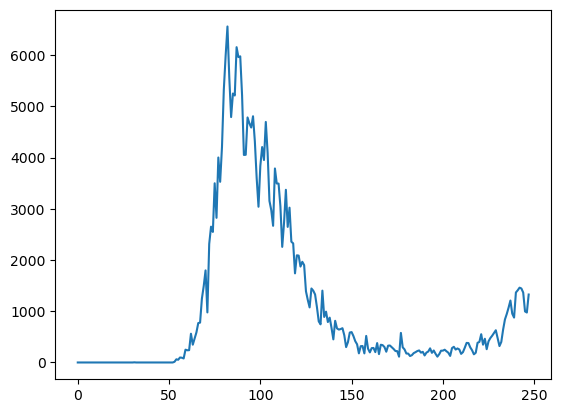

In [97]:
result_df.new_cases.plot();

Während dieses Diagramm den Gesamttrend zeigt, ist es schwer zu sagen, wo der Höhepunkt auftrat, da es auf der X-Achse keine Daten gibt. Wir können die Spalte `date` als Index für das Data Frame verwenden, um dieses Problem zu beheben.

In [98]:
result_df.set_index('date', inplace=True)

In [99]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403


Das ist richtig, der Index eines Data Frames muss nicht numerisch sein. Durch die Umwandlung des Datums in einen Index können wir auch die Daten für bestimmte Daten mithilfe von `.loc` abrufen

In [100]:
result_df.loc['2020-09-01']

new_cases             9.960000e+02
total_cases           2.696595e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           5.214766e+06
cases_per_million     4.459996e+03
deaths_per_million    5.868661e+02
tests_per_million     8.624890e+04
Name: 2020-09-01 00:00:00, dtype: float64

In [101]:
result_df.new_cases

date
2019-12-31       0.0
2020-01-01       0.0
2020-01-02       0.0
2020-01-03       0.0
2020-01-04       0.0
               ...  
2020-08-30    1444.0
2020-08-31    1365.0
2020-09-01     996.0
2020-09-02     975.0
2020-09-03    1326.0
Name: new_cases, Length: 248, dtype: float64

Lassen Sie uns die neuen Fälle und neuen Todesfälle pro Tag als Liniendiagramme darstellen.

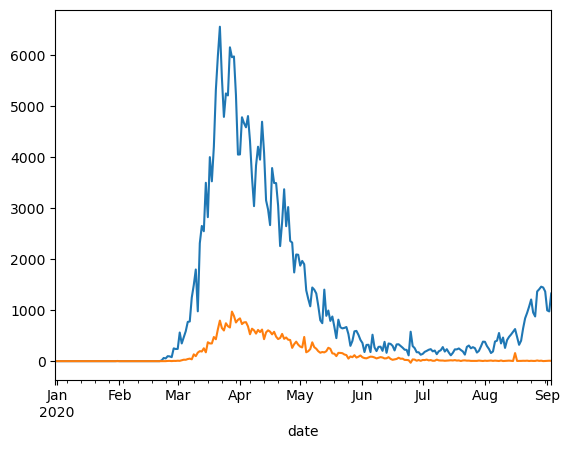

In [102]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

Wir können auch die Gesamtzahl der Fälle mit der Gesamtzahl der Todesfälle vergleichen.

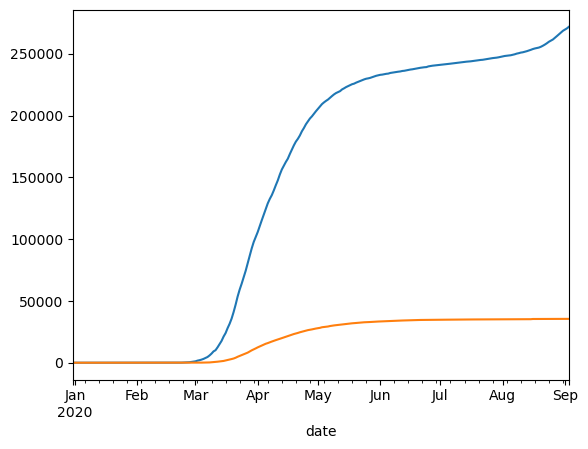

In [103]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

Sehen wir uns an, wie sich die Sterblichkeitsrate und die positiven Testraten im Laufe der Zeit ändern.

In [104]:
death_rate = result_df.total_deaths / result_df.total_cases

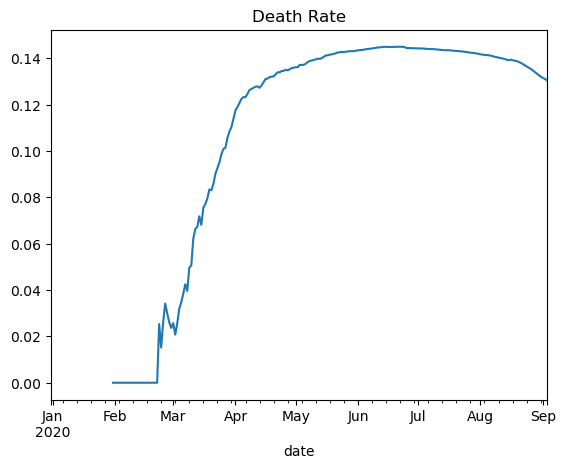

In [105]:
death_rate.plot(title='Death Rate');

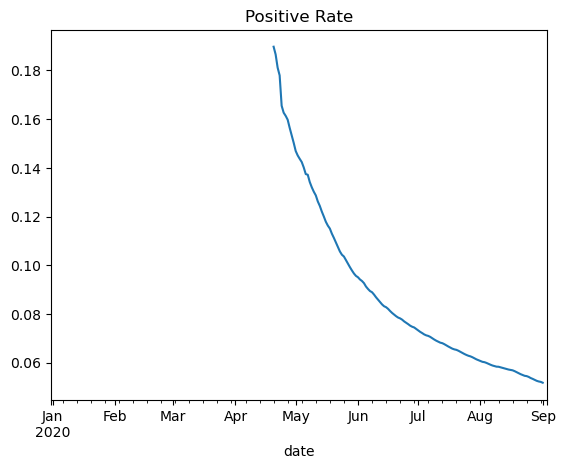

In [106]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');

Lassen Sie uns abschließend einige monatliche Daten mithilfe eines Balkendiagramms darstellen, um den Trend auf einer höheren Ebene zu visualisieren.

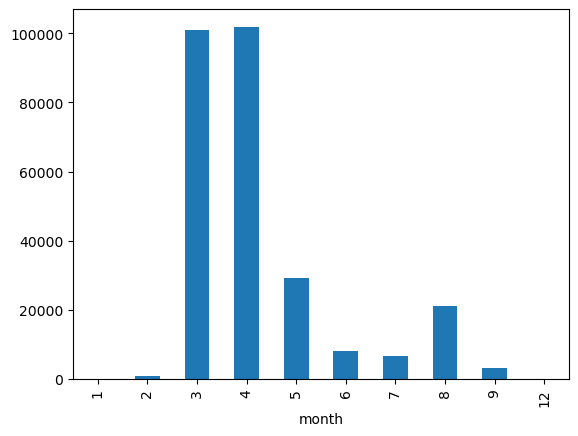

In [107]:
covid_month_df.new_cases.plot(kind='bar');

<Axes: xlabel='month'>

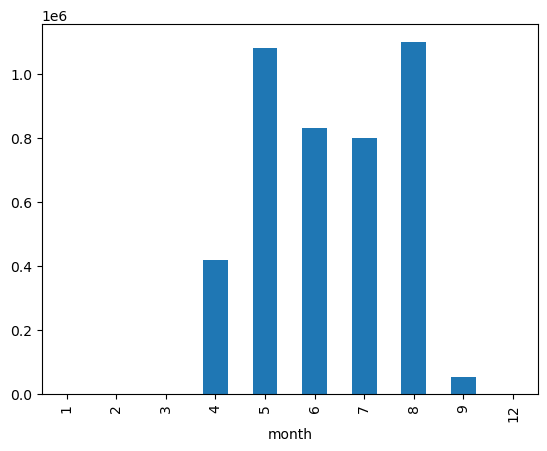

In [108]:
covid_month_df.new_tests.plot(kind='bar')

## Weiterführende Literatur

Schauen Sie sich die folgenden Ressourcen an, um mehr über Pandas zu erfahren:

* [Pandas-Übungen](https://github.com/guipsamora/pandas_exercises)
* [Benutzerhandbuch für Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
* [Python for Data Analysis (Buch von Wes McKinney – Entwickler von Pandas)](https://wesmckinney.com/book/)